In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [52]:
kout = [1e-4,1e-3,1e-2,1e-1,1.0]
Geffvec = [1e-4,1e-3,1e-2,1e-1]
models = ['freestreaming','fluid']

cvis2 = {'freestreaming':1./3.,'fluid':0.}
for i in range(len(Geffvec)):
    models.append(i)
    models.append('CYR'+str(i))
    
#models = ['freestreaming','ncdm',0]
    
lmax = 17
Nbins_inu = 30
cosmo = {}
for M in models:
    print M
    cosmo[M] = Class()
    cosmo[M].set({'output':'tCl mPk dTk vTk', 
           'YHe' : 0.25, 
           'k_output_values' : str(kout).strip('[]'), 
             'radiation_streaming_approximation':3,
              'background_verbose':5,
                  'N_inu':0.,
                  'tol_inu_synchronous' : Nbins_inu,
                  'start_small_k_at_tau_c_over_tau_h':0.0015/10.,
                  'start_large_k_at_tau_h_over_tau_k':0.07,
                  'start_sources_at_tau_c_over_tau_h':0.008/10
             })
    if M=='freestreaming' or M=='fluid':
        cosmo[M].set({'N_ur':3.0,'ur_fluid_approximation':3,'cvis2_ur':cvis2[M],'ceff2_ur':1./3.,'l_max_ur':lmax})
    elif M=='ncdm':
        cosmo[M].set({'N_ur':0.0,'ncdm_fluid_approximation':3,'l_max_ncdm':lmax,'N_ncdm':1,'m_ncdm':0.000001,
                      'deg_ncdm':3.0,'T_ncdm':(4./11.)**(1./3.)})
    elif not isinstance(M,int) and 'CYR' in M:
        print int(M[3])
        Geff = Geffvec[int(M[3])]
        cosmo[M].set({'N_ur':3.0,'ur_fluid_approximation':3,'N_inu': 0.0,'l_max_ur':lmax,'G_eff_CYR':Geff})
    else:
        cosmo[M].set({'N_ur':0.0,'N_inu': 3.0,'l_max_inu':lmax,'G_eff':Geffvec[M]})
    print cosmo[M].pars
    cosmo[M].compute()


freestreaming
{'radiation_streaming_approximation': 3, 'tol_inu_synchronous': 30, 'N_ur': 3.0, 'k_output_values': '0.0001, 0.001, 0.01, 0.1, 1.0', 'start_small_k_at_tau_c_over_tau_h': 0.00015000000000000001, 'YHe': 0.25, 'ceff2_ur': 0.3333333333333333, 'start_large_k_at_tau_h_over_tau_k': 0.07, 'cvis2_ur': 0.3333333333333333, 'N_inu': 0.0, 'ur_fluid_approximation': 3, 'background_verbose': 5, 'output': 'tCl mPk dTk vTk', 'l_max_ur': 17, 'start_sources_at_tau_c_over_tau_h': 0.0008}
fluid
{'radiation_streaming_approximation': 3, 'tol_inu_synchronous': 30, 'N_ur': 3.0, 'k_output_values': '0.0001, 0.001, 0.01, 0.1, 1.0', 'start_small_k_at_tau_c_over_tau_h': 0.00015000000000000001, 'YHe': 0.25, 'ceff2_ur': 0.3333333333333333, 'start_large_k_at_tau_h_over_tau_k': 0.07, 'cvis2_ur': 0.0, 'N_inu': 0.0, 'ur_fluid_approximation': 3, 'background_verbose': 5, 'output': 'tCl mPk dTk vTk', 'l_max_ur': 17, 'start_sources_at_tau_c_over_tau_h': 0.0008}
0
{'radiation_streaming_approximation': 3, 'tol_inu

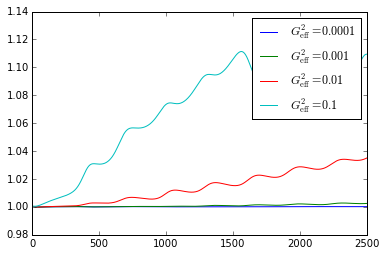

In [53]:
for i, Geff in enumerate(Geffvec):
    cl_inu = cosmo[i].raw_cl()
    cl_cyr = cosmo['CYR'+str(i)].raw_cl()
    l = cl_cyr['ell'][2:]
    label = r'$G_\mathrm{eff}^2='+str(Geff)+'$'
    plt.plot(l,cl_inu['tt'][2:]/cl_cyr['tt'][2:],label=label)
plt.legend()

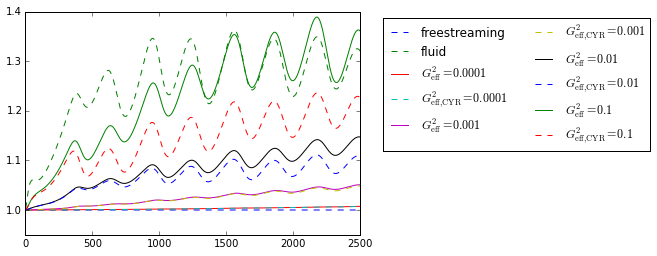

In [54]:

clref = cosmo['freestreaming'].raw_cl()
for M in models:
    cl = cosmo[M].raw_cl()
    l = cl['ell'][2:]
    if isinstance(M,int):
        #continue
        label = r'$G_\mathrm{eff}^2='+str(Geffvec[M])+'$'
        ls='-'
    else:
        if 'CYR' in M:
            label = r'$G_\mathrm{eff, CYR}^2='+str(Geffvec[int(M[3])])+'$'
        else:
            label = M
        ls = '--'
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:],label=label,ls=ls)
#plt.ylim([0.997,1.003])
plt.legend(loc='upper left',ncol=2, bbox_to_anchor=(1.05, 1))

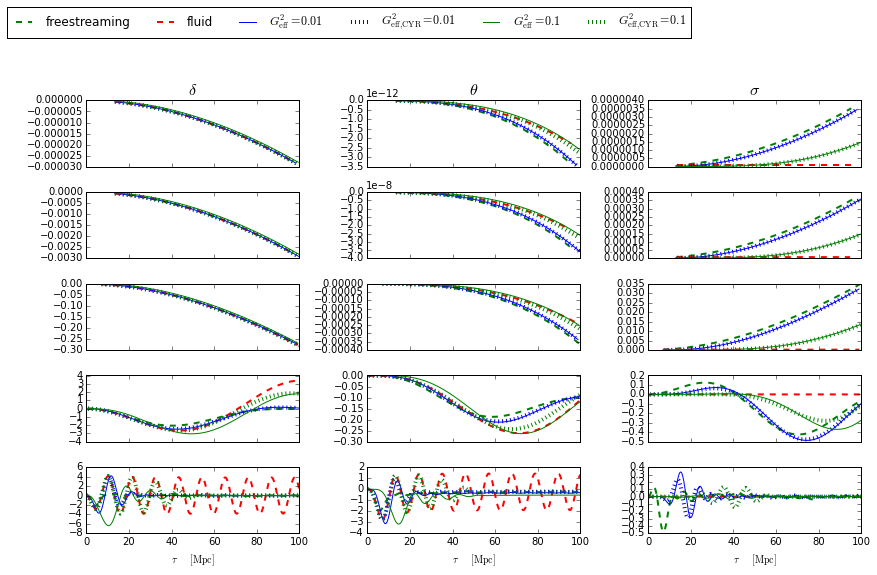

In [55]:
pt_types = ['delta','theta','shear']
fig, axes = plt.subplots(len(kout),len(pt_types),figsize=(12,7),sharex=True)
taumin = 0
taumax = 100

plotmodels = ['freestreaming','fluid']
for i in range(2,len(Geffvec)):
    plotmodels.append(i)
    plotmodels.append('CYR'+str(i))
colours = ['m','c','b','g','r','k']
for M in plotmodels:
    #if M=='fluid':
    #    continue
    #if isinstance(M,int) and M<4:
    #    continue
    pts = cosmo[M].get_perturbations()['scalar']
    for kidx, k in enumerate(kout):
        pt = pts[kidx]
        for pt_idx, pt_type in enumerate(pt_types):
            tau = pt['tau [Mpc]']
            mask = (tau>taumin)*(tau<taumax)
            if isinstance(M,int):
                label = r'$G_\mathrm{eff}^2='+str(Geffvec[M])+'$'
                ls='-'
                lw=1
                colour = colours[M]
                y = pt[pt_type+'_inu']
            else:
                if M=='ncdm':
                    label = M
                    y = pt[pt_type+'_ncdm[0]']
                    colour = 'c'
                    ls = '--'
                    lw=2
                elif 'CYR' in M:
                    y = pt[pt_type+'_ur']
                    label = r'$G_\mathrm{eff, CYR}^2='+str(Geffvec[int(M[3])])+'$'
                    colour = colours[int(M[3])]
                    ls = ':'
                    lw=4
                else:
                    if M=='fluid':
                        colour = 'r'
                    else:
                        colour = 'g'
                    label = M
                    y = pt[pt_type+'_ur']
                    ls = '--'
                    lw=2
            axes[kidx,pt_idx].plot(tau[mask],y[mask],label=label,ls=ls,lw=lw,color=colour)
lgd=axes[0,0].legend(loc='upper left',ncol=6,bbox_to_anchor=(-0.4, 2.5))
for ax in axes[-1,:]:
    ax.set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$')
for pt_idx, pt_type in enumerate(pt_types):
    if pt_type=='shear':
        pt_type='sigma'
    axes[0,pt_idx].set_title(r'$'+'\\'+pt_type+'$',fontsize=16)

fig.tight_layout()
fig.savefig('inu_perturbations_zoom.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [22]:
plotmodels = ['freestreaming','fluid']
for i in range(2,len(Geffvec)):
    plotmodels.append(i)
    plotmodels.append('CYR'+str(i))
colours = ['m','c','b','g','r','k']
plotmodel = models
for M in models:
    if M=='fluid':
        continue
    #if isinstance(M,int) and M<4:
    #    continue
    pts = cosmo[M].get_perturbations()['scalar']
    for kidx, k in enumerate(kout):
        pt = pts[kidx]
        for pt_idx, pt_type in enumerate(pt_types):
            tau = pt['tau [Mpc]']
            mask = (tau>taumin)*(tau<taumax)
            if isinstance(M,int):
                label = r'$G_\mathrm{eff}^2='+str(Geffvec[M])+'$'
                ls='-'
                lw=1
                colour = colours[M]
                y = pt[pt_type+'_inu']
            else:
                if M=='ncdm':
                    label = M
                    y = pt[pt_type+'_ncdm[0]']
                    colour = 'c'
                    ls = '--'
                    lw=2
                elif 'CYR' in M:
                    y = pt[pt_type+'_ur']
                    label = r'$G_\mathrm{eff, CYR}^2='+str(Geffvec[int(M[3])])+'$'
                    colour = colours[int(M[3])]
                    ls = ':'
                    lw=4
                else:
                    if M=='fluid':
                        colour = 'r'
                    else:
                        colour = 'g'
                    label = M
                    y = pt[pt_type+'_ur']
                    ls = '--'
                    lw=2
            axes[kidx,pt_idx].plot(tau[mask],y[mask],label=label,ls=ls,lw=lw,color=colour)
lgd=axes[0,0].legend(loc='upper left',ncol=6,bbox_to_anchor=(-0.4, 2.5))
for ax in axes[-1,:]:
    ax.set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$')
for pt_idx, pt_type in enumerate(pt_types):
    if pt_type=='shear':
        pt_type='sigma'
    axes[0,pt_idx].set_title(r'$'+'\\'+pt_type+'$',fontsize=16)

fig.tight_layout()
fig.savefig('inu_perturbations_zoom.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

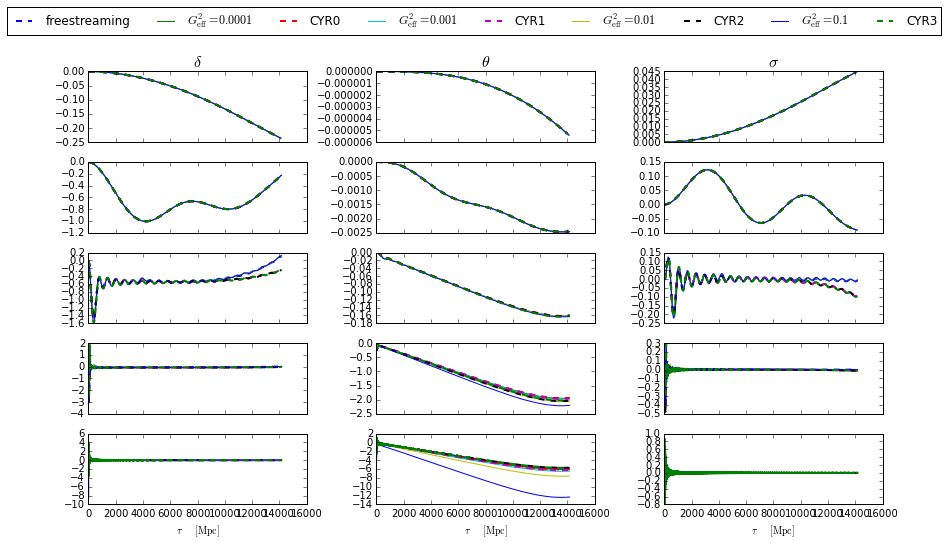

In [23]:
pt_types = ['delta','theta','shear']
fig, axes = plt.subplots(len(kout),len(pt_types),figsize=(12,7),sharex=True)
taumin = 0
taumax = 16000

for M in models:
    if M=='fluid':
        continue
    pts = cosmo[M].get_perturbations()['scalar']
    for kidx, k in enumerate(kout):
        pt = pts[kidx]
        for pt_idx, pt_type in enumerate(pt_types):
            if isinstance(M,int):
                label = r'$G_\mathrm{eff}^2='+str(Geffvec[M])+'$'
                ls='-'
                lw=1
                y = pt[pt_type+'_inu']
            else:
                if M=='ncdm':
                    y = pt[pt_type+'_ncdm[0]']
                else:
                    y = pt[pt_type+'_ur']
                label = M
                ls = '--'
                lw=2
            tau = pt['tau [Mpc]']
            mask = (tau>taumin)*(tau<taumax)
            axes[kidx,pt_idx].plot(tau[mask],y[mask],label=label,ls=ls,lw=lw)
lgd=axes[0,0].legend(loc='upper left',ncol=len(models),bbox_to_anchor=(-0.4, 2))
for ax in axes[-1,:]:
    ax.set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$')
for pt_idx, pt_type in enumerate(pt_types):
    if pt_type=='shear':
        pt_type='sigma'
    axes[0,pt_idx].set_title(r'$'+'\\'+pt_type+'$',fontsize=16)

fig.tight_layout()
fig.savefig('inu_perturbations_no_fluid.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

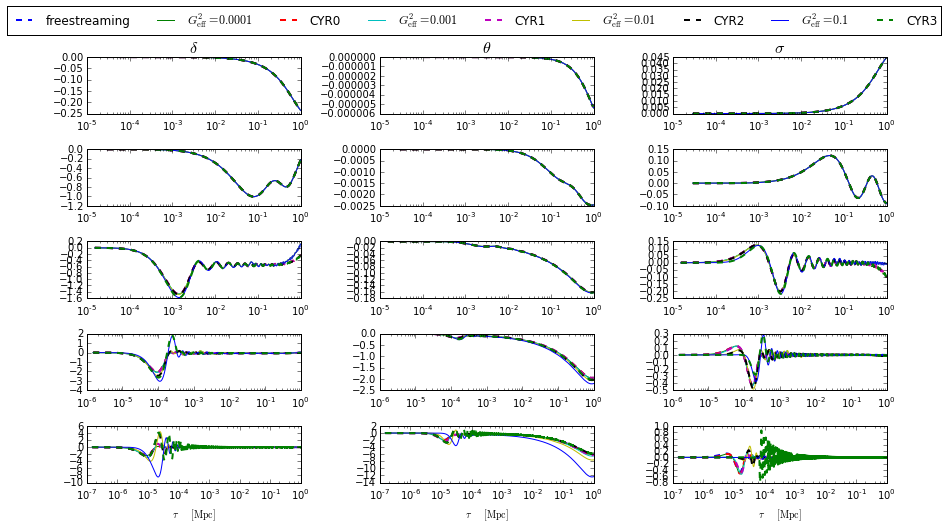

In [24]:
pt_types = ['delta','theta','shear']
fig, axes = plt.subplots(len(kout),len(pt_types),figsize=(12,7))

for M in models:
    if M=='fluid':
        continue
    pts = cosmo[M].get_perturbations()['scalar']
    for kidx, k in enumerate(kout):
        pt = pts[kidx]
        for pt_idx, pt_type in enumerate(pt_types):
            if isinstance(M,int):
                label = r'$G_\mathrm{eff}^2='+str(Geffvec[M])+'$'
                ls='-'
                lw=1
                y = pt[pt_type+'_inu']
            else:
                if M=='ncdm':
                    y = pt[pt_type+'_ncdm[0]']
                else:
                    y = pt[pt_type+'_ur']
                label = M
                ls = '--'
                lw=2
            tau = pt['tau [Mpc]']
            z = pt['z']
            confH = np.array([1./(1+zz)*cosmo[M].Hubble(zz) for zz in z])
            
            axes[kidx,pt_idx].semilogx(1./(1+z),y,label=label,ls=ls,lw=lw)
lgd=axes[0,0].legend(loc='upper left',ncol=len(models),bbox_to_anchor=(-0.4, 2))
for ax in axes[-1,:]:
    ax.set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$')
for pt_idx, pt_type in enumerate(pt_types):
    if pt_type=='shear':
        pt_type='sigma'
    axes[0,pt_idx].set_title(r'$'+'\\'+pt_type+'$',fontsize=16)

fig.tight_layout()
fig.savefig('inu_perturbations_no_fluid.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [25]:
bg = csm.get_background()
print bg.viewkeys()

dict_keys(['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur'])


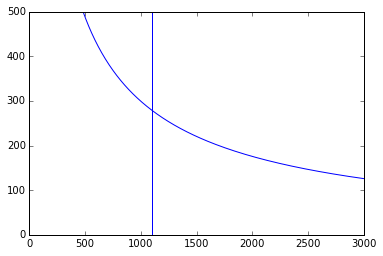

In [10]:
plt.plot(bg['z'],bg['conf. time [Mpc]'])
plt.xlim([0,3000])
plt.ylim([0,500])
plt.axvline(1100)

In [14]:
csm=cosmo['fluid']

In [ ]:
csm.Hubble()